In [1]:
from Game import *

Version:  0.2.36


## Game functions

In [2]:
def initial_state():
    return 21

In [3]:
def valid_moves(state,player):
    if state==1:
        return [1]
    elif state==2:
        return [1,2]
    else:
        return [1,2,3]
    

In [4]:
def update_state(state,player,move):
    
    new_state=state-move
    
    return new_state

In [5]:
def show_state(state):
    number_of_sticks=state
    print("The number of sticks is ",number_of_sticks)

In [6]:
def win_status(state,player):

    # the state here is the state after the player made the move
    
    # returns  - 'win'  if the state is a winning state for the player, 
    #            'lose' if the state is a losing state for the player,
    #            'stalemate' for a stalemate
    #            None otherwise    
    
    
    if state==1:
        return "win"
    
    if state==0:
        return "lose"
    
    

## Agents

In [7]:
def random_move(state,player):    
    moves=valid_moves(state,player)
    return random.choice(moves)
 
random_agent=Agent(random_move)    

In [8]:
def human_move(state,player):    
    move=int(input("How many sticks to take?"))
    return move
 
human_agent=Agent(human_move)    

In [9]:
from Game.minimax import *
def minimax_move(state,player):
    values,moves=minimax_values(state,player,display=True)
    return top_choice(moves,values)
    
    
    
minimax_agent=Agent(minimax_move)

In [10]:
def skittles_move(state,player,info):
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    
    
    if state not in T:
        actions=valid_moves(state,player)
        T[state]=Table()
        for action in actions:
            T[state][action]=3  # number of skittles
        
    
    move=weighted_choice(T[state])
    
    if move is None:  # can't win from this state
        if not last_state is None:
            T[last_state][last_action]-=1   # take away a skittle
            if T[last_state][last_action]<0:
                T[last_state][last_action]=0
    
        move=random_move(state,player)
    
    return move

def skittles_after(status,player,info):  # this is called after the game is over
    T=info.T
    last_state=info.last_state
    last_action=info.last_action

    if status=='lose':
        T[last_state][last_action]-=1   # take away a skittle
        if T[last_state][last_action]<0:
            T[last_state][last_action]=0
    
    

In [11]:
skittles_agent1=Agent(skittles_move)
skittles_agent1.T=Table()
skittles_agent1.post=skittles_after

skittles_agent2=Agent(skittles_move)
skittles_agent2.T=Table()
skittles_agent2.post=skittles_after

## Running the Game

In [15]:
g=Game(number_of_games=10)
g.run(skittles_agent1,random_agent)

====
Game  1
The number of sticks is  21
Player 1 moves 1
The number of sticks is  20
Player 2 moves 3
The number of sticks is  17
Player 1 moves 2
The number of sticks is  15
Player 2 moves 1
The number of sticks is  14
Player 1 moves 2
The number of sticks is  12
Player 2 moves 1
The number of sticks is  11
Player 1 moves 2
The number of sticks is  9
Player 2 moves 1
The number of sticks is  8
Player 1 moves 2
The number of sticks is  6
Player 2 moves 1
The number of sticks is  5
Player 1 moves 2
The number of sticks is  3
Player 2 moves 2
The number of sticks is  1
Player  2 won.
====
Game  2
The number of sticks is  21
Player 1 moves 3
The number of sticks is  18
Player 2 moves 3
The number of sticks is  15
Player 1 moves 2
The number of sticks is  13
Player 2 moves 2
The number of sticks is  11
Player 1 moves 3
The number of sticks is  8
Player 2 moves 2
The number of sticks is  6
Player 1 moves 2
The number of sticks is  4
Player 2 moves 2
The number of sticks is  2
Player 1 move

[2, 2, 1, 1, 2, 1, 2, 1, 2, 1]

In [16]:
skittles_agent1.T

{21: {1: 3, 2: 3, 3: 3},
 16: {1: 3, 2: 3, 3: 3},
 14: {1: 3, 2: 3, 3: 3},
 9: {1: 3, 2: 3, 3: 3},
 3: {1: 3, 2: 3, 3: 3},
 17: {1: 3, 2: 3, 3: 3},
 11: {1: 3, 2: 3, 3: 3},
 8: {1: 3, 2: 3, 3: 3},
 5: {1: 3, 2: 2, 3: 3},
 15: {1: 3, 2: 3, 3: 3},
 6: {1: 3, 2: 1, 3: 3},
 2: {1: 3, 2: 2},
 13: {1: 3, 2: 3, 3: 3},
 18: {1: 3, 2: 3, 3: 3},
 4: {1: 3, 2: 2, 3: 3},
 10: {1: 3, 2: 3, 3: 3},
 7: {1: 3, 2: 3, 3: 3},
 19: {1: 3, 2: 3, 3: 3}}

In [17]:
SaveTable(skittles_agent1.T,"Skittles 1 Table.json")

## a little debugging

In [22]:
g=Game(number_of_games=20)
g.display=False

result=g.run(skittles_agent1,random_agent)


In [23]:
result

[1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1]

In [24]:
result.count(1)

14

In [25]:
result.count(2)

6

In [26]:
result.count(0)

0

In [27]:
len(result)

20

## Progress!

In [32]:
skittles_agent1.T=Table()

In [33]:
%matplotlib inline
from matplotlib.pyplot import figure,plot,grid,legend,xlabel,ylabel,title
from tqdm.notebook import tqdm

In [34]:
S=Storage()
one,two,ties,N=0,0,0,0

In [48]:
for i in tqdm(range(1000)):
    g=Game(number_of_games=1)
    g.display=False
    
    result=g.run(skittles_agent1,random_agent)
    one,two,ties,N=one+result.count(1),two+result.count(2),ties+result.count(0),N+len(result)
    
    S+=one/N*100,two/N*100,ties/N*100,N

  0%|          | 0/1000 [00:00<?, ?it/s]

In [49]:
y1,y2,y0,x=S.arrays()

In [50]:
from bigfonts import *

Text(0, 0.5, 'Percent')

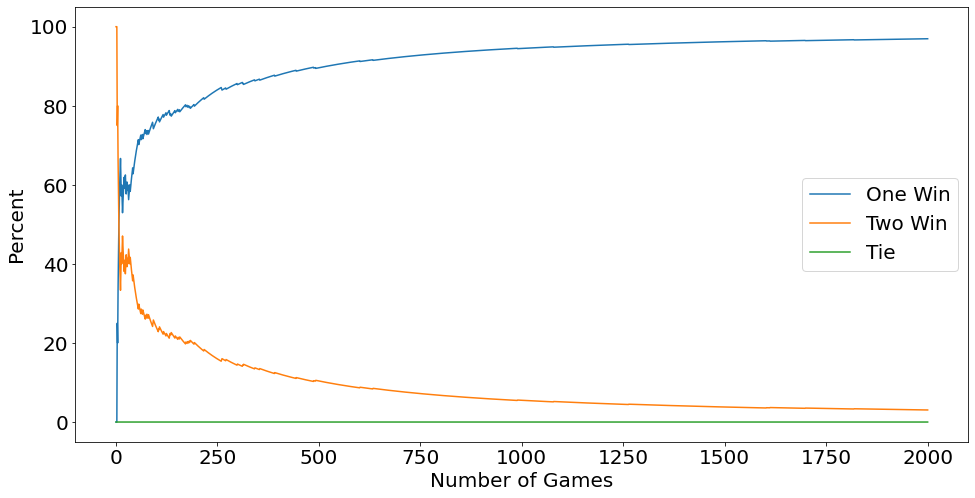

In [51]:
figure(figsize=(16,8))
plot(x,y1,label='One Win')
plot(x,y2,label='Two Win')
plot(x,y0,label='Tie')
legend()
xlabel('Number of Games')
ylabel('Percent')